In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0, 799, 800)

In [3]:
y = torch.sin(x*2*3.1416/40)

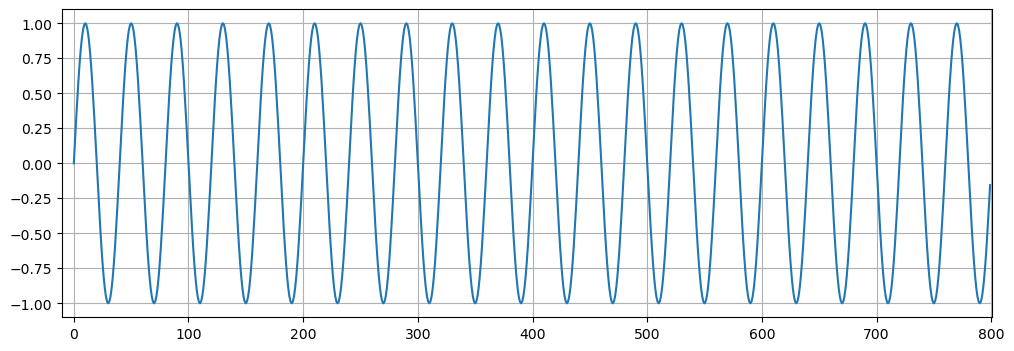

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

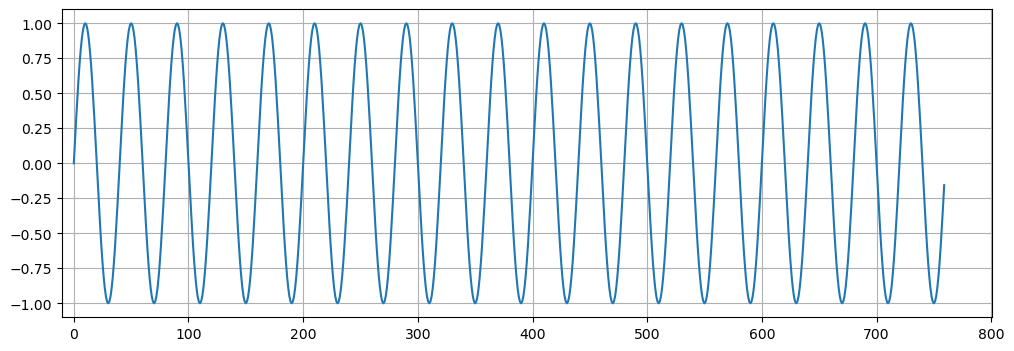

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

In [7]:
def input_data(seq, ws):

    out = []   # such as: ([0, 1, 2, 3], [4]), ([1, 2, 3, 4], [5]) ...
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))

    return out

In [8]:
window_size = 40  # Figure out window_size based on your own domain knowledge

train_data = input_data(train_set, window_size)

In [9]:
len(train_data)

720

total data points:  0-799 --> 800
train data after substract the last 40 test data points:  800-40  --> 760
but for training, the window size should be removed: 760-40  --> 720

In [10]:
train_data[0]  # it has 40 data points and 1 extra value (predicted value)

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [11]:
train_data[1]  
# the first value starts from the second value from train_data[0]
# the last value are from the predicted value
# Then we got one extra value again

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

## Create LSTM

In [12]:
class LSTM(nn.Module):

    def __init__(self, input_size=1, hidden_size=50, out_size=1):

        super().__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size)

        self.linear = nn.Linear(hidden_size, out_size)

        # (H, C)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

    def forward(self, seq):

        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)

        pred = self.linear(lstm_out.view(len(seq), -1))

        return pred[-1]

In [13]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [15]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


### Training

In [16]:
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422032475471497,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 0.9999999403953552,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch 0 Loss: 0.09212878346443176
Performance on test range: 0.6071590185165405


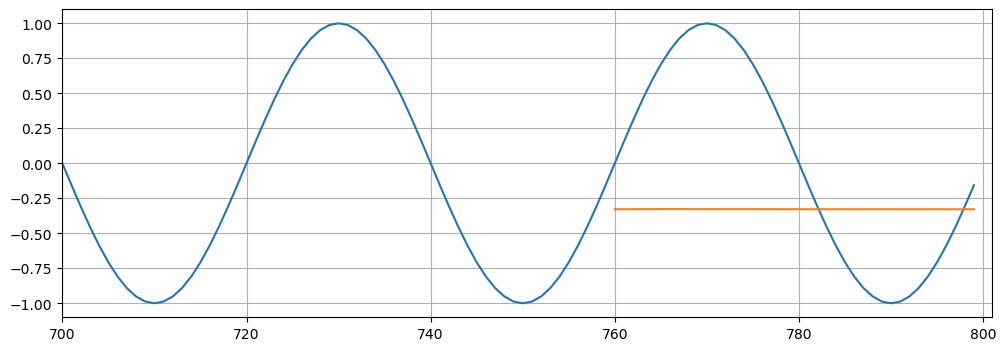

Epoch 1 Loss: 0.06506764143705368
Performance on test range: 0.5650988221168518


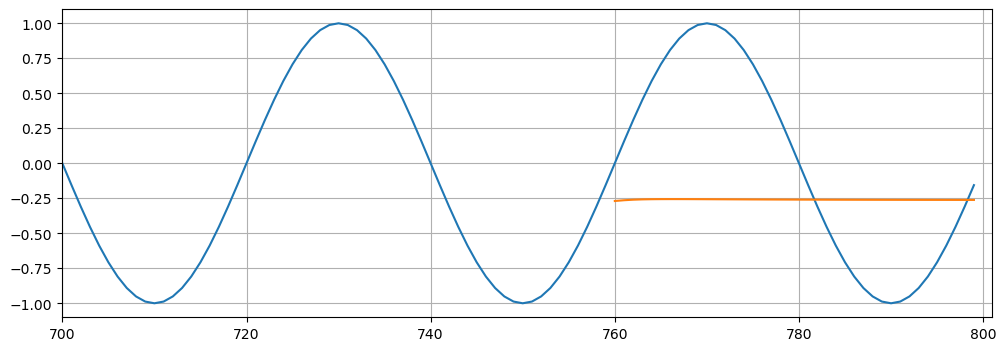

Epoch 2 Loss: 0.041980478912591934
Performance on test range: 0.5199716091156006


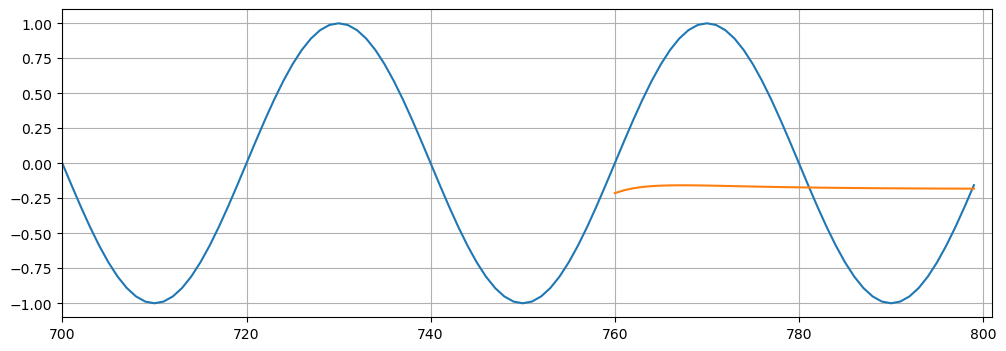

Epoch 3 Loss: 0.017842764034867287
Performance on test range: 0.42209967970848083


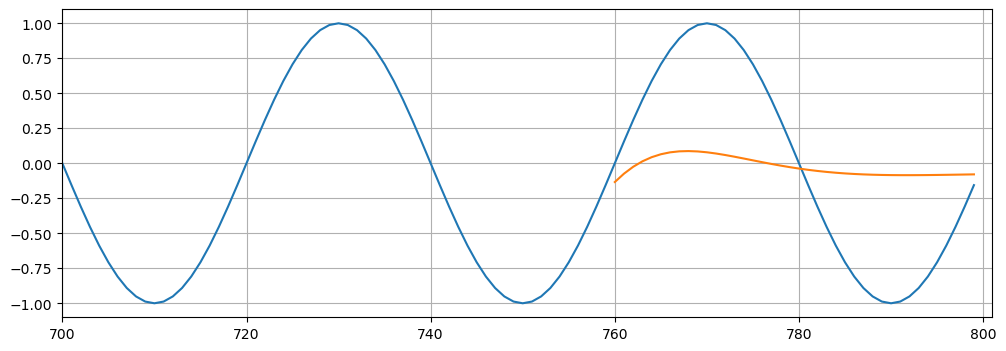

Epoch 4 Loss: 0.002887103008106351
Performance on test range: 0.16624128818511963


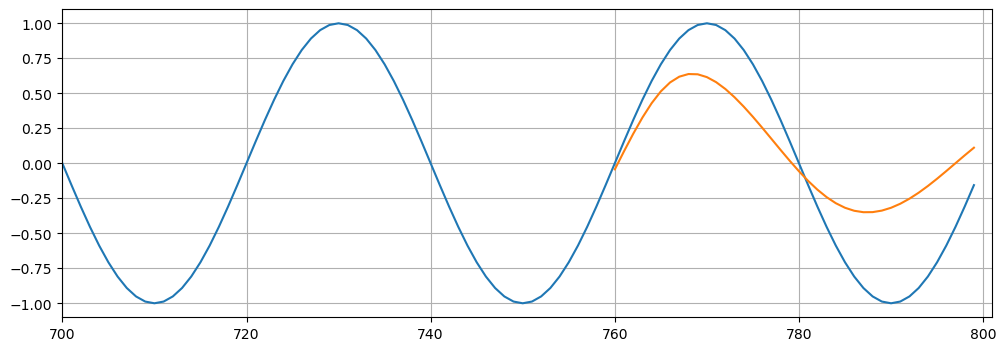

Epoch 5 Loss: 0.00032007633126340806
Performance on test range: 0.03055441938340664


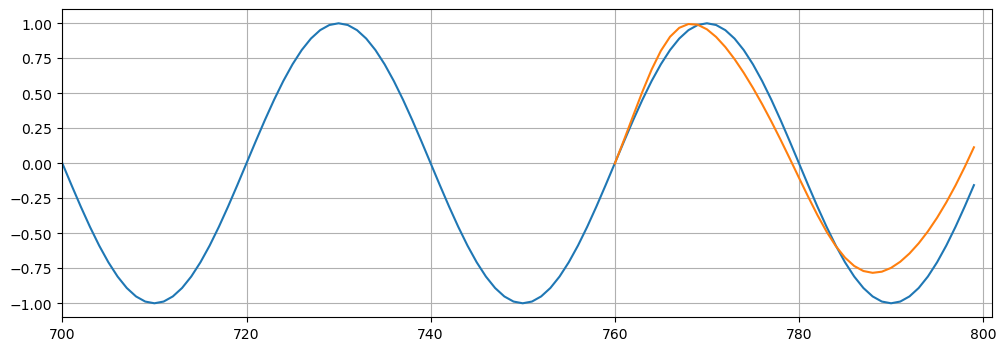

Epoch 6 Loss: 0.0001296920672757551
Performance on test range: 0.01499023474752903


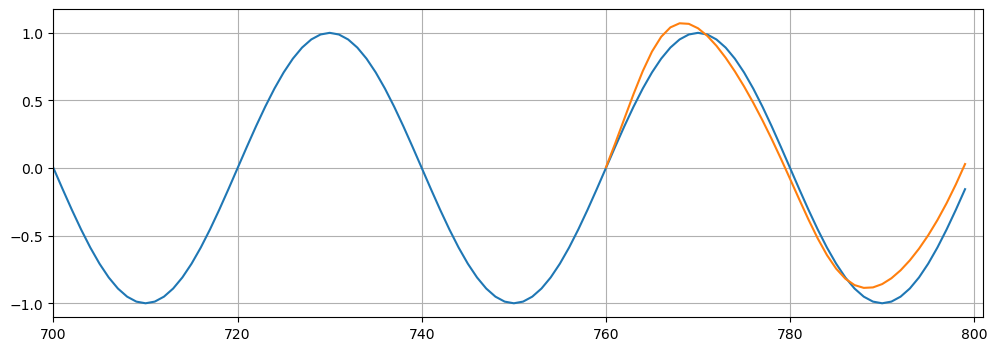

Epoch 7 Loss: 0.00012006668112007901
Performance on test range: 0.011856628581881523


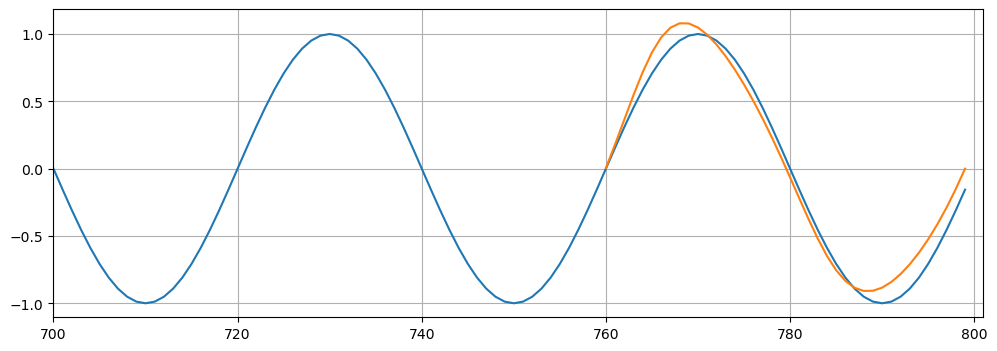

Epoch 8 Loss: 0.00012655690079554915
Performance on test range: 0.01016379613429308


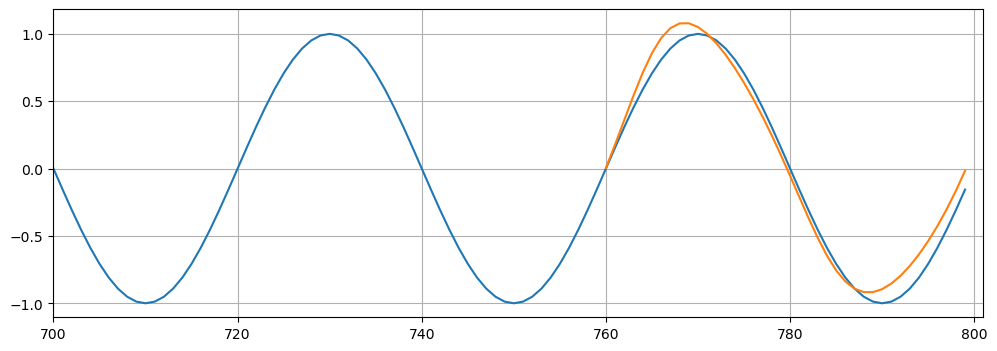

Epoch 9 Loss: 0.00013195407518651336
Performance on test range: 0.008897574618458748


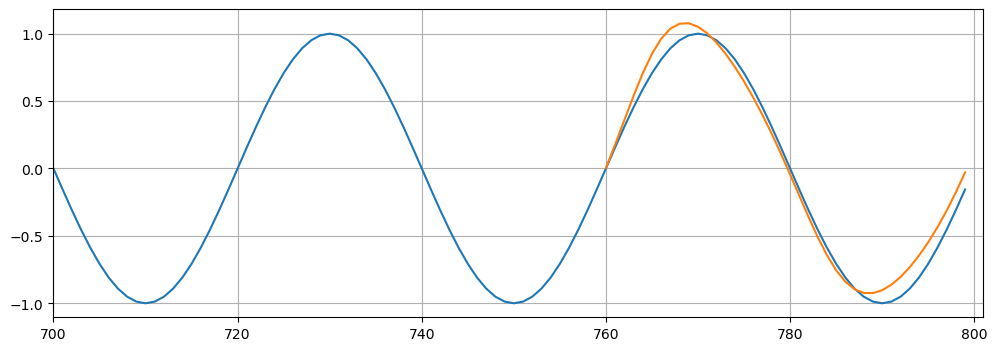

In [17]:
epochs = 10
future = 40

for i in range(epochs):

    for seq, y_train in train_data:  # seq is the 40 data points in each tuple, y_train is the real data for training in the tuple

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                        torch.zeros(1,1,model.hidden_size))  # reset the parameters and hidden states
        
        # Perfrom the prediction
        y_pred = model(seq)  # passing the sequence (40 data points) into the model

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()  # update all parameters

    print(f'Epoch {i} Loss: {loss.item()}')

    preds = train_set[-window_size:].tolist()

    for f in range(future):

        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():

            # reset hidden state and cell state
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))

            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Performance on test range: {loss}')

    plt.figure(figsize=(12,4))
    plt.xlim(700, 801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()

In [18]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)
len(all_data)

760

In [19]:
import time
start_time = time.time()

for i in range(epochs):

    for seq, y_train in all_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch {i} Loss: {loss.item()}')

total_time =time.time() - start_time
print(f'Total Duration of training tims is {total_time/60} minitues')

Epoch 0 Loss: 0.00013453103019855917
Epoch 1 Loss: 0.0001344304473605007
Epoch 2 Loss: 0.0001323175529250875
Epoch 3 Loss: 0.00012879523274023086
Epoch 4 Loss: 0.00012434215750545263
Epoch 5 Loss: 0.00011931286280741915
Epoch 6 Loss: 0.00011398135393392295
Epoch 7 Loss: 0.00010853995627257973
Epoch 8 Loss: 0.00010312719678040594
Epoch 9 Loss: 9.78425596258603e-05
Epoch 10 Loss: 9.274368494516239e-05
Epoch 11 Loss: 8.78764913068153e-05
Epoch 12 Loss: 8.325872477144003e-05
Epoch 13 Loss: 7.88994730100967e-05
Epoch 14 Loss: 7.480583008145913e-05
Total Duration of training tims is 0.41361761490503945 minitues


# Forecast into unknown future

In [20]:
preds = y[-window_size:].tolist()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        preds.append(model(seq).item())

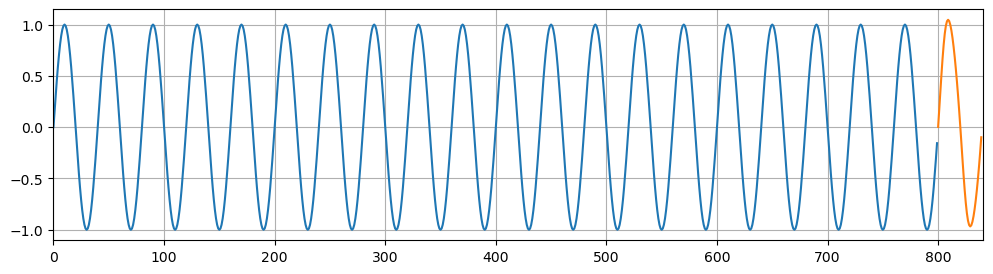

In [21]:
plt.figure(figsize=(12, 3))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future), preds[window_size:])
plt.show()